Epoch 1/5
625/625 [==============================] - 20s 31ms/step - loss: 0.3749 - accuracy: 0.8356 - val_loss: 0.2693 - val_accuracy: 0.8899
Epoch 2/5
625/625 [==============================] - 19s 31ms/step - loss: 0.2249 - accuracy: 0.9106 - val_loss: 0.2735 - val_accuracy: 0.8886
Epoch 3/5
625/625 [==============================] - 19s 31ms/step - loss: 0.1913 - accuracy: 0.9277 - val_loss: 0.2873 - val_accuracy: 0.8867
Epoch 4/5
625/625 [==============================] - 20s 31ms/step - loss: 0.1707 - accuracy: 0.9362 - val_loss: 0.3095 - val_accuracy: 0.8821
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8755
Test Accuracy: 0.8755


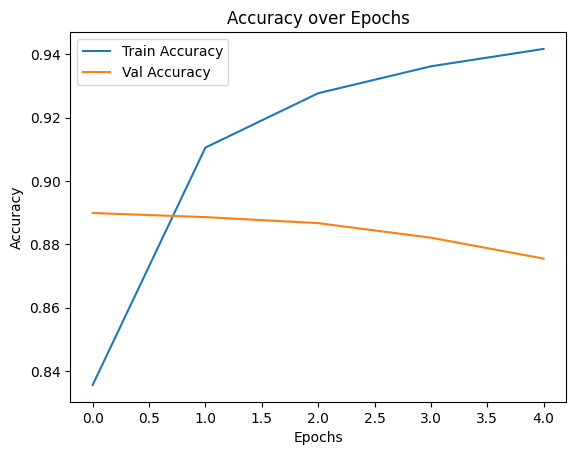

313/313 [==============================] - 1s 3ms/step

Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.91      0.88      4993
    Positive       0.90      0.84      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



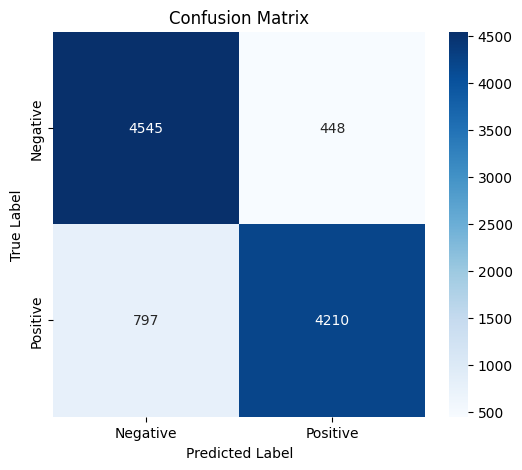

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# ✅ Load dataset
data = pd.read_csv('IMDB.csv')
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

reviews = data['review'].values
labels = data['sentiment'].values

# ✅ Tokenization
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_reviews = pad_sequences(sequences, maxlen=max_len)

# ✅ Train-test split
split = int(0.8 * len(padded_reviews))
x_train, x_test = padded_reviews[:split], padded_reviews[split:]
y_train, y_test = labels[:split], labels[split:]

# ✅ Build model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ✅ Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# ✅ Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# ✅ Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ✅ Confusion matrix
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# ✅ Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()